In [7]:
# Tech Giants Stock Market Data - Enhanced Exploratory Data Analysis

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
warnings.filterwarnings('ignore')


In [8]:
# Set visualization styles
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12


In [9]:
# 1. Data Loading and Initial Exploration
print("1. Loading and exploring the dataset...\n")

# Load the dataset
# Note: Update the path to your actual file path
df = pd.read_csv('15 Years Stock Data of NVDA AAPL MSFT GOOGL and AMZN.csv',)

1. Loading and exploring the dataset...



In [10]:
# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (3774, 26)

First 5 rows:
         Date  Close_AAPL  Close_AMZN  Close_GOOGL  Close_MSFT  Close_NVDA  \
0  2010-01-04    6.440330      6.6950    15.609805   23.254051    0.423884   
1  2010-01-05    6.451465      6.7345    15.541064   23.261557    0.430073   
2  2010-01-06    6.348847      6.6125    15.149294   23.118809    0.432824   
3  2010-01-07    6.337109      6.5000    14.796624   22.878376    0.424342   
4  2010-01-08    6.379242      6.6760    14.993881   23.036165    0.425259   

   High_AAPL  High_AMZN  High_GOOGL  High_MSFT  ...  Open_AAPL  Open_AMZN  \
0   6.455075     6.8305   15.678546  23.366752  ...   6.422875     6.8125   
1   6.487878     6.7740   15.636953  23.366746  ...   6.458086     6.6715   
2   6.477046     6.7365   15.587638  23.351725  ...   6.451466     6.7300   
3   6.379842     6.6160   15.192630  23.066212  ...   6.372319     6.6005   
4   6.379844     6.6840   15.024515  23.201460  ...   6.328685     6.5280   

   Open_GOOGL  Open_MSFT  O

In [11]:
# Check data types
print("\nData types:")
print(df.dtypes)


Data types:
Date             object
Close_AAPL      float64
Close_AMZN      float64
Close_GOOGL     float64
Close_MSFT      float64
Close_NVDA      float64
High_AAPL       float64
High_AMZN       float64
High_GOOGL      float64
High_MSFT       float64
High_NVDA       float64
Low_AAPL        float64
Low_AMZN        float64
Low_GOOGL       float64
Low_MSFT        float64
Low_NVDA        float64
Open_AAPL       float64
Open_AMZN       float64
Open_GOOGL      float64
Open_MSFT       float64
Open_NVDA       float64
Volume_AAPL       int64
Volume_AMZN       int64
Volume_GOOGL      int64
Volume_MSFT       int64
Volume_NVDA       int64
dtype: object


In [12]:
# Summary statistics for closing prices
close_cols = [col for col in df.columns if col.startswith('Close_')]
print("\nSummary statistics for closing prices:")
print(df[close_cols].describe())


Summary statistics for closing prices:
        Close_AAPL   Close_AMZN  Close_GOOGL   Close_MSFT   Close_NVDA
count  3774.000000  3774.000000  3774.000000  3774.000000  3774.000000
mean     67.521690    71.444840    61.149777   129.578311    13.977600
std      65.602673    61.124111    46.638356   124.987871    28.088261
min       5.779478     5.430500    10.860739    17.447613     0.203574
25%      17.461680    14.987375    22.581480    28.772202     0.411332
50%      35.323715    48.394751    47.151819    64.985474     3.544295
75%     126.909601   120.965000    93.473120   228.535389    13.567127
max     258.735504   232.929993   196.433777   464.854340   148.856064


In [13]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
Date            0
Close_AAPL      0
Close_AMZN      0
Close_GOOGL     0
Close_MSFT      0
Close_NVDA      0
High_AAPL       0
High_AMZN       0
High_GOOGL      0
High_MSFT       0
High_NVDA       0
Low_AAPL        0
Low_AMZN        0
Low_GOOGL       0
Low_MSFT        0
Low_NVDA        0
Open_AAPL       0
Open_AMZN       0
Open_GOOGL      0
Open_MSFT       0
Open_NVDA       0
Volume_AAPL     0
Volume_AMZN     0
Volume_GOOGL    0
Volume_MSFT     0
Volume_NVDA     0
dtype: int64


In [14]:
# 2. Data Preprocessing
print("\n2. Preprocessing the data...\n")

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
print("Date column converted to datetime.")


2. Preprocessing the data...

Date column converted to datetime.


In [15]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")


Number of duplicate rows: 0


In [16]:
# Handle missing values if any
if df.isnull().sum().sum() > 0:
    print("\nFilling missing values:")
    # For numeric columns, fill with forward fill for time series
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(method='ffill')
            # If there are still NAs at the beginning, backward fill
            df[col] = df[col].fillna(method='bfill')
            print(f"  - Filled missing values in {col}")

In [17]:
# Set Date as index for time series analysis
df.set_index('Date', inplace=True)
print("Date set as index.")

Date set as index.


In [18]:
# Display the processed dataframe
print("\nProcessed dataframe:")
print(df.head())


Processed dataframe:
            Close_AAPL  Close_AMZN  Close_GOOGL  Close_MSFT  Close_NVDA  \
Date                                                                      
2010-01-04    6.440330      6.6950    15.609805   23.254051    0.423884   
2010-01-05    6.451465      6.7345    15.541064   23.261557    0.430073   
2010-01-06    6.348847      6.6125    15.149294   23.118809    0.432824   
2010-01-07    6.337109      6.5000    14.796624   22.878376    0.424342   
2010-01-08    6.379242      6.6760    14.993881   23.036165    0.425259   

            High_AAPL  High_AMZN  High_GOOGL  High_MSFT  High_NVDA  ...  \
Date                                                                ...   
2010-01-04   6.455075     6.8305   15.678546  23.366752   0.426864  ...   
2010-01-05   6.487878     6.7740   15.636953  23.366746   0.434658  ...   
2010-01-06   6.477046     6.7365   15.587638  23.351725   0.433741  ...   
2010-01-07   6.379842     6.6160   15.192630  23.066212   0.432366  ...   
20

In [19]:
# 3. Enhanced Feature Engineering
print("\n3. Creating enhanced features...\n")

# Add date-based features
df['Day_of_Week'] = df.index.dayofweek
df['Month'] = df.index.month
df['Quarter'] = df.index.quarter
df['Year'] = df.index.year
print("Added date-based features: Day_of_Week, Month, Quarter, Year")


3. Creating enhanced features...

Added date-based features: Day_of_Week, Month, Quarter, Year


In [20]:
# Define the list of companies
companies = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'NVDA']

# Calculate daily returns for each stock
for company in companies:
    # Returns (daily percentage change)
    df[f'Return_{company}'] = df[f'Close_{company}'].pct_change() * 100
    
    # Volatility (20-day rolling standard deviation of returns)
    df[f'Volatility_{company}'] = df[f'Return_{company}'].rolling(window=20).std()
    
    # Price range as percentage
    df[f'Range_Pct_{company}'] = (df[f'High_{company}'] - df[f'Low_{company}']) / df[f'Open_{company}'] * 100

    # Moving averages (short, medium, long term)
    df[f'MA20_{company}'] = df[f'Close_{company}'].rolling(window=20).mean()
    df[f'MA50_{company}'] = df[f'Close_{company}'].rolling(window=50).mean()
    df[f'MA200_{company}'] = df[f'Close_{company}'].rolling(window=200).mean()

    # Relative Strength Index (RSI)
    delta = df[f'Close_{company}'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df[f'RSI_{company}'] = 100 - (100 / (1 + rs))

print("Added technical indicators: Returns, Volatility, Range metrics, Moving Averages, RSI")

Added technical indicators: Returns, Volatility, Range metrics, Moving Averages, RSI


In [21]:
# Create market index (weighted average of all 5 stocks)
df['Market_Index'] = df[[f'Close_{company}' for company in companies]].mean(axis=1)
df['Market_Return'] = df['Market_Index'].pct_change() * 100
print("Created market index and market return")

Created market index and market return


In [22]:
# Calculate beta for each stock (using 252-day rolling window)
window = 252  # Approximately one trading year
for company in companies:
    # Ensure we have enough data for the calculation
    if len(df) > window:
        # Calculate covariance between stock return and market return
        rolling_cov = df[f'Return_{company}'].rolling(window=window).cov(df['Market_Return'])
        # Calculate variance of market return
        rolling_market_var = df['Market_Return'].rolling(window=window).var()
        # Calculate beta
        df[f'Beta_{company}'] = rolling_cov / rolling_market_var
        print(f"Calculated beta for {company}")

Calculated beta for AAPL
Calculated beta for AMZN
Calculated beta for GOOGL
Calculated beta for MSFT
Calculated beta for NVDA


In [23]:
# Display some of the engineered features
print("\nSample of engineered features for AAPL:")
print(df[['Close_AAPL', 'Return_AAPL', 'Volatility_AAPL', 'MA20_AAPL', 'RSI_AAPL', 'Beta_AAPL']].head(5))


Sample of engineered features for AAPL:
            Close_AAPL  Return_AAPL  Volatility_AAPL  MA20_AAPL  RSI_AAPL  \
Date                                                                        
2010-01-04    6.440330          NaN              NaN        NaN       NaN   
2010-01-05    6.451465     0.172904              NaN        NaN       NaN   
2010-01-06    6.348847    -1.590619              NaN        NaN       NaN   
2010-01-07    6.337109    -0.184889              NaN        NaN       NaN   
2010-01-08    6.379242     0.664867              NaN        NaN       NaN   

            Beta_AAPL  
Date                   
2010-01-04        NaN  
2010-01-05        NaN  
2010-01-06        NaN  
2010-01-07        NaN  
2010-01-08        NaN  



4. Analyzing stock price time series...



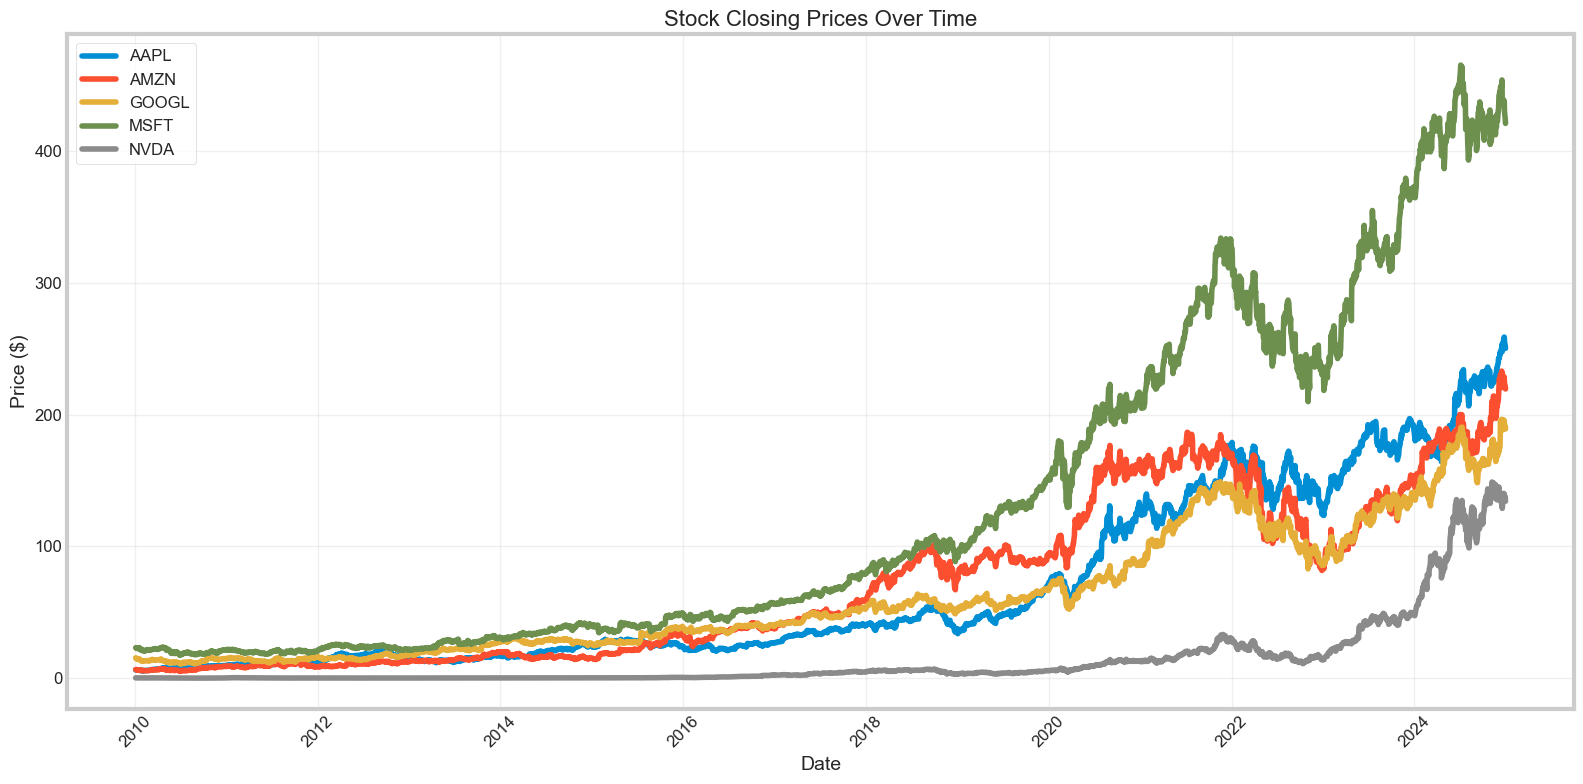

In [ ]:
# 4. Time Series Analysis of Stock Prices
print("\n4. Analyzing stock price time series...\n")

# Plot closing prices of all companies
plt.figure(figsize=(16, 8))
for company in companies:
    plt.plot(df[f'Close_{company}'], label=company)
plt.title('Stock Closing Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('closing_prices.png')
plt.show()

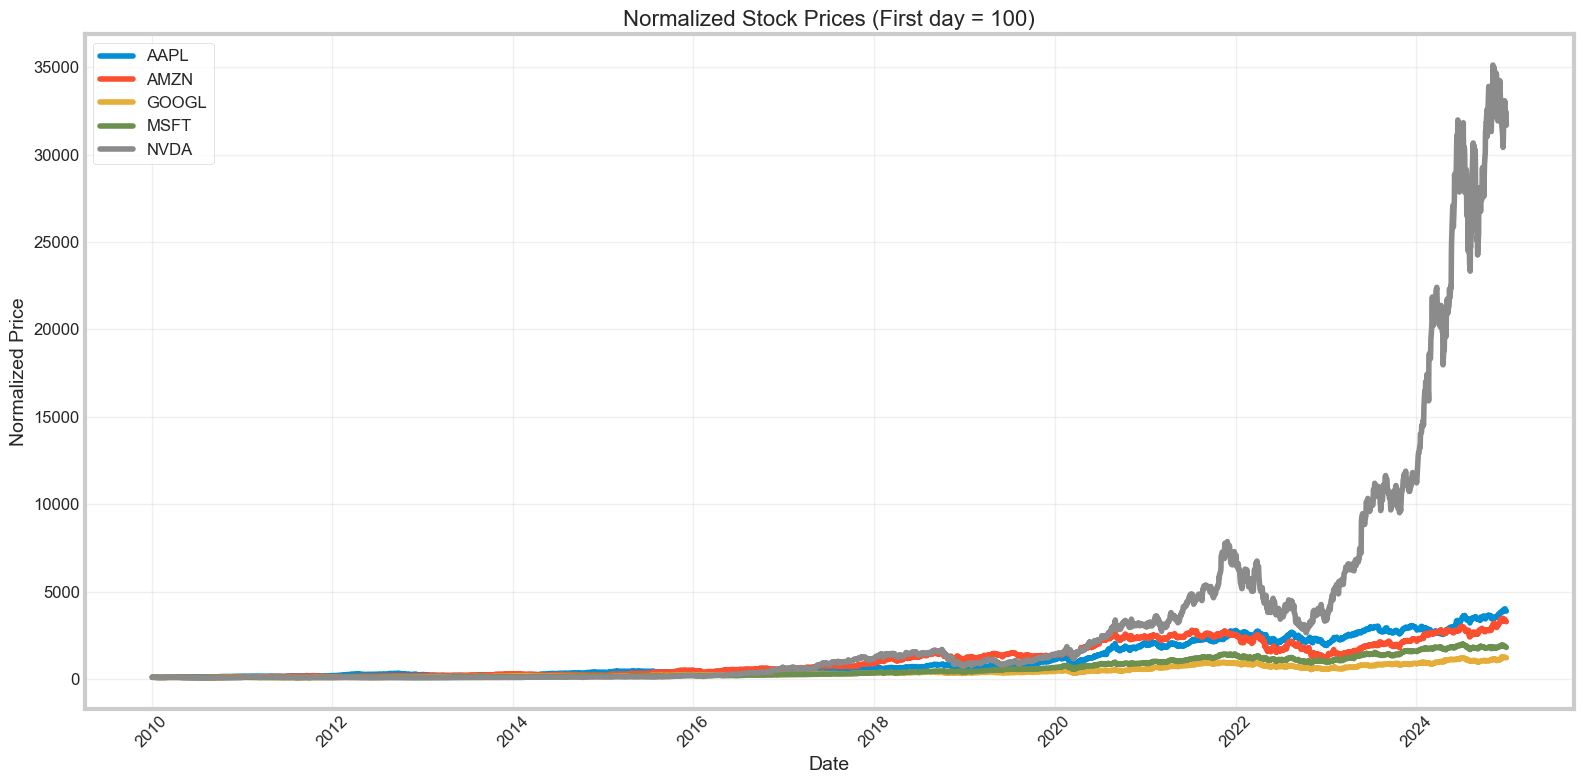

In [ ]:
# Normalize prices for better comparison
plt.figure(figsize=(16, 8))
for company in companies:
    normalized_price = df[f'Close_{company}'] / df[f'Close_{company}'].iloc[0] * 100
    plt.plot(normalized_price, label=company)
plt.title('Normalized Stock Prices (First day = 100)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Normalized Price', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('normalized_prices.png')
plt.show()


5. Analyzing trading volumes...



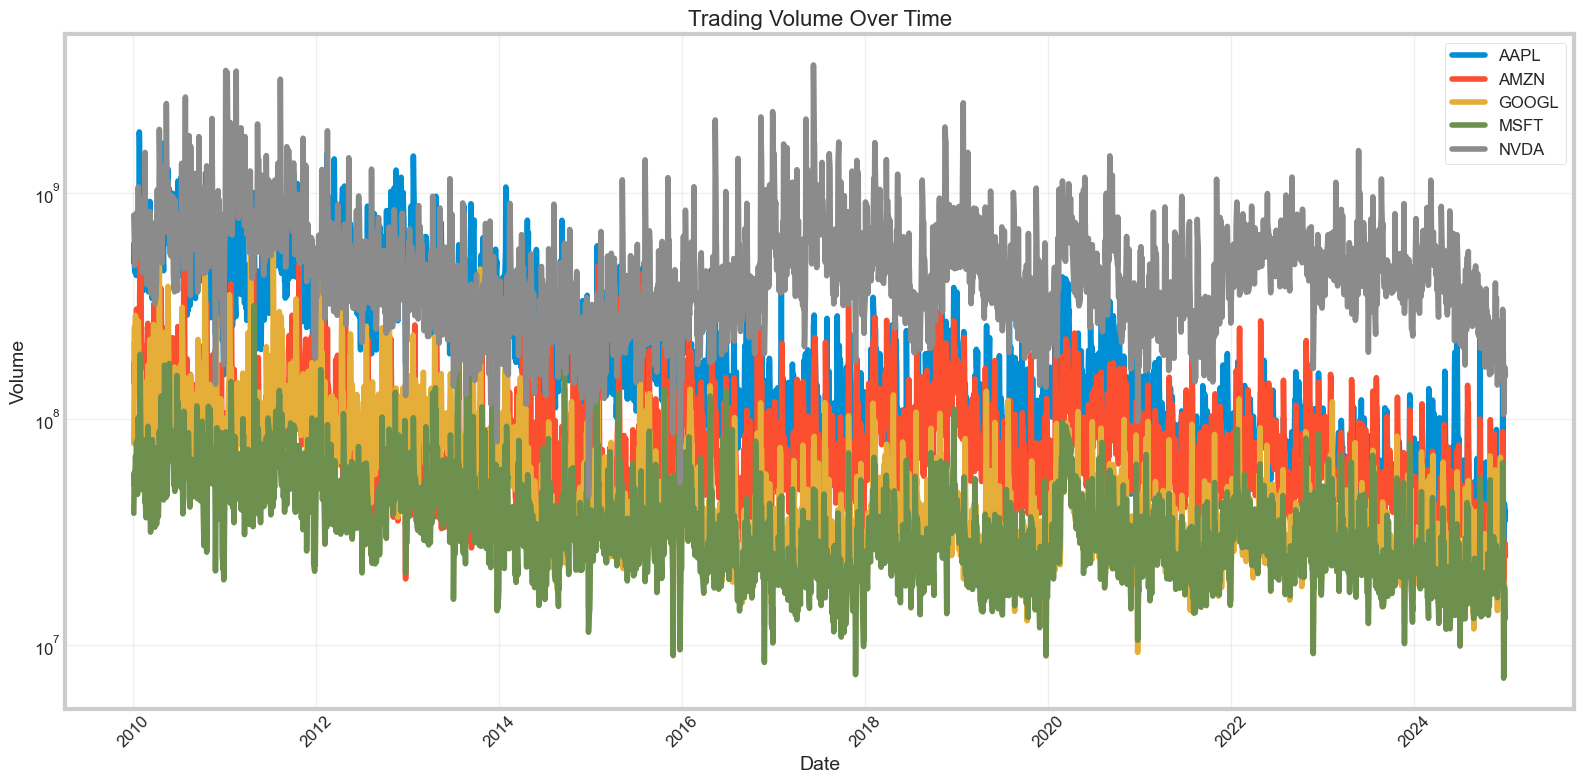

In [ ]:
# 5. Trading Volume Analysis
print("\n5. Analyzing trading volumes...\n")

# Plot trading volumes
plt.figure(figsize=(16, 8))
for company in companies:
    plt.plot(df[f'Volume_{company}'], label=company)
plt.title('Trading Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.legend(fontsize=12)
plt.yscale('log')  # Log scale often works better for volume
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('trading_volumes.png')
plt.show()

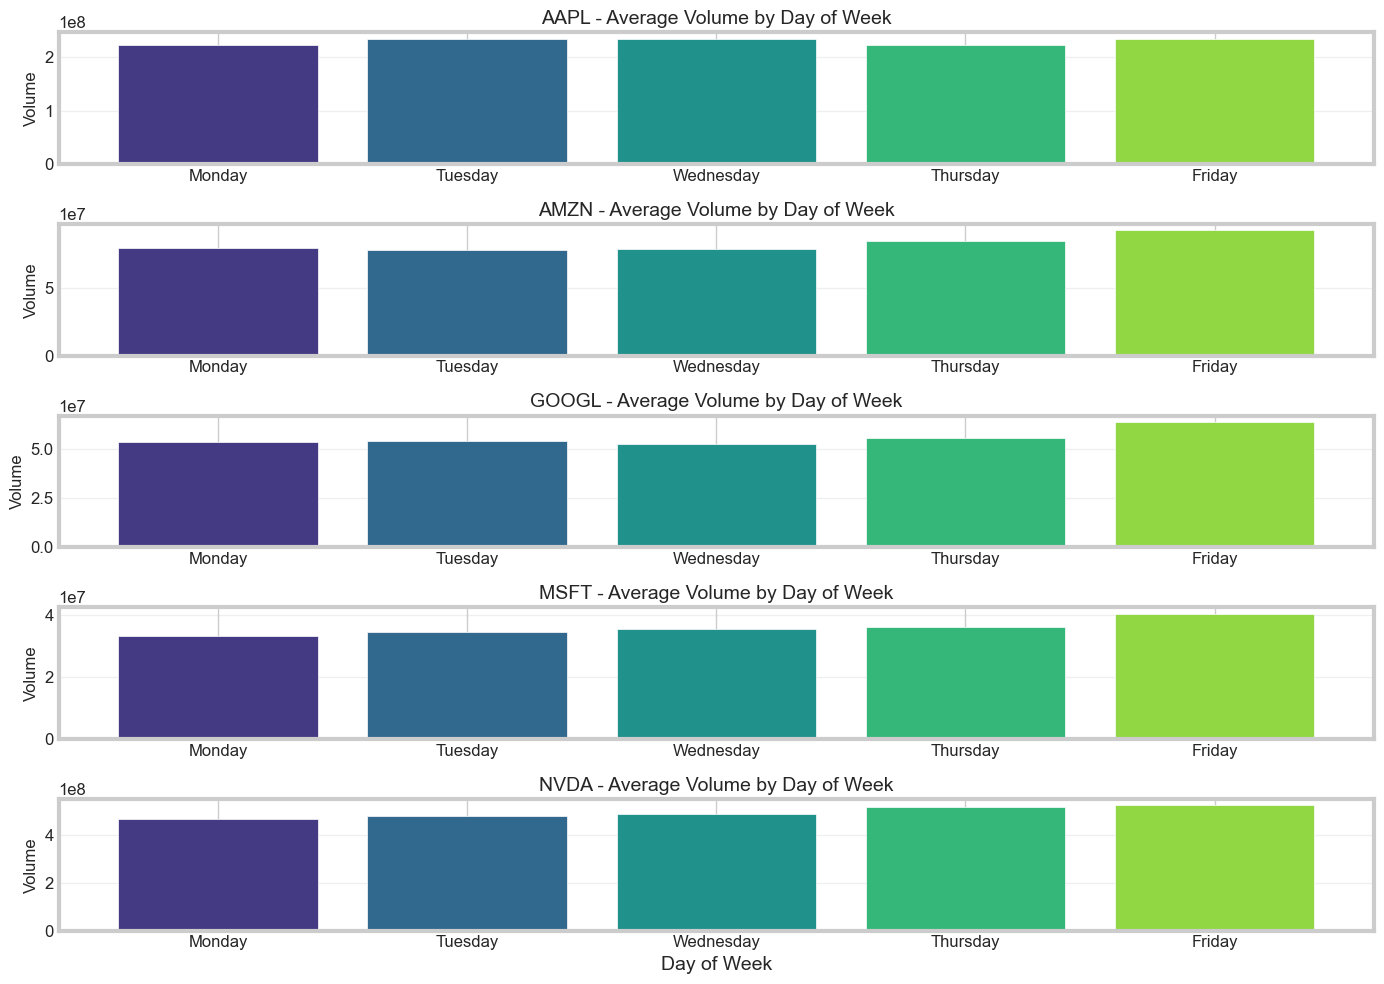

In [ ]:
# Plot average daily volume by day of week
plt.figure(figsize=(14, 10))
for i, company in enumerate(companies, 1):
    plt.subplot(len(companies), 1, i)
    day_volume = df.groupby('Day_of_Week')[f'Volume_{company}'].mean()
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    plt.bar(days, day_volume, color=sns.color_palette("viridis", 5))
    plt.title(f'{company} - Average Volume by Day of Week', fontsize=14)
    plt.ylabel('Volume', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    if i == len(companies):  # Only show x-label for the bottom plot
        plt.xlabel('Day of Week', fontsize=14)
plt.tight_layout()
#plt.savefig('volume_by_day.png')
plt.show()


6. Analyzing returns...



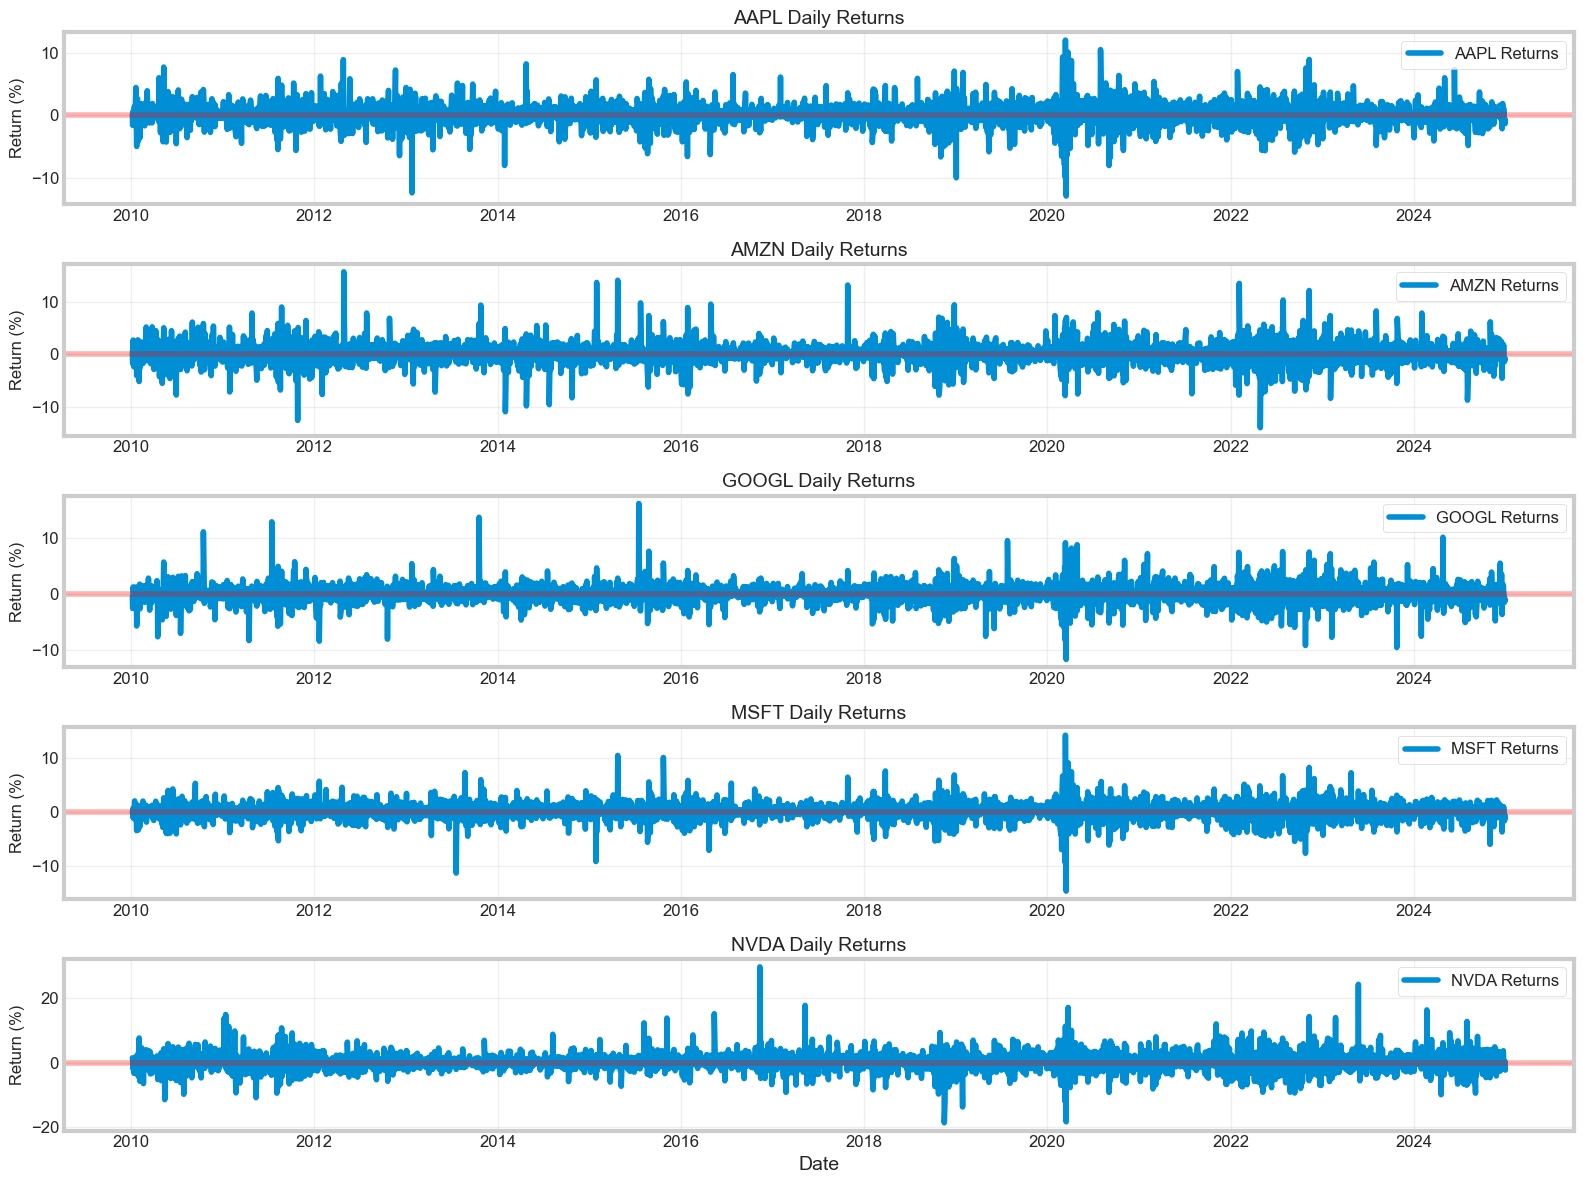

In [ ]:
# 6. Return Analysis
print("\n6. Analyzing returns...\n")

# Plot daily returns for all companies
plt.figure(figsize=(16, 12))
for i, company in enumerate(companies, 1):
    plt.subplot(len(companies), 1, i)
    plt.plot(df[f'Return_{company}'], label=f'{company} Returns')
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    plt.title(f'{company} Daily Returns', fontsize=14)
    plt.ylabel('Return (%)', fontsize=12)
    if i == len(companies):  # Only show x-label for the bottom plot
        plt.xlabel('Date', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('daily_returns.png')
plt.show()

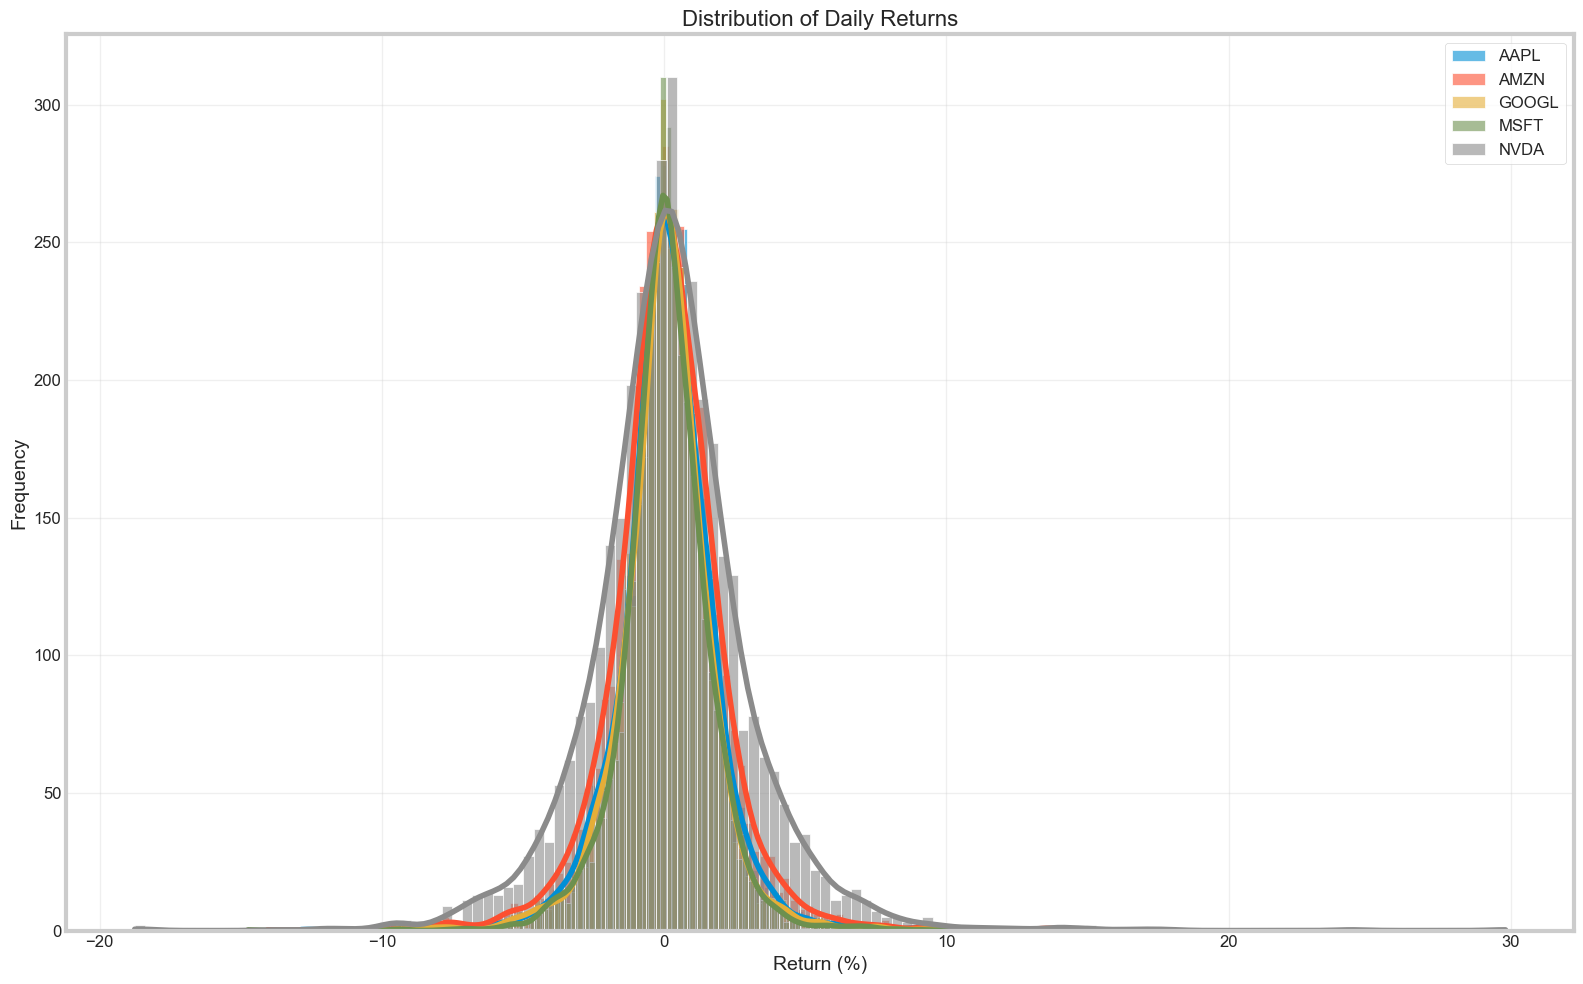

In [ ]:
# Create a histogram of returns for all companies
plt.figure(figsize=(16, 10))
for company in companies:
    sns.histplot(df[f'Return_{company}'].dropna(), kde=True, label=company, alpha=0.6)
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Return (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('return_distribution.png')
plt.show()

In [30]:
# Calculate and display summary statistics for returns
returns_df = df[[f'Return_{company}' for company in companies]].copy()
returns_df.columns = companies  # Rename for clarity
print("Summary statistics for returns:")
print(returns_df.describe())

Summary statistics for returns:
              AAPL         AMZN        GOOGL         MSFT         NVDA
count  3773.000000  3773.000000  3773.000000  3773.000000  3773.000000
mean      0.112446     0.113707     0.080897     0.089742     0.193289
std       1.755202     2.061350     1.721712     1.610936     2.862335
min     -12.864679   -14.049438   -11.634153   -14.739044   -18.755866
25%      -0.739840    -0.902925    -0.736436    -0.708450    -1.243485
50%       0.100101     0.094631     0.085466     0.069490     0.166414
75%       1.035533     1.190612     0.926041     0.923325     1.586117
max      11.980825    15.745693    16.258427    14.216891    29.806694


In [31]:
# Test for normality of returns
print("\nNormality tests for returns (Shapiro-Wilk):")
for company in companies:
    # Take a sample if dataset is large (Shapiro-Wilk works best with smaller samples)
    sample = df[f'Return_{company}'].dropna()
    if len(sample) > 5000:
        sample = sample.sample(5000, random_state=42)
    
    stat, p = stats.shapiro(sample)
    print(f'{company}: Statistic={stat:.6f}, p-value={p:.6f}')
    if p < 0.05:
        print(f'  {company} returns are NOT normally distributed (reject H0)')
    else:
        print(f'  {company} returns appear to be normally distributed (fail to reject H0)')


Normality tests for returns (Shapiro-Wilk):
AAPL: Statistic=0.946839, p-value=0.000000
  AAPL returns are NOT normally distributed (reject H0)
AMZN: Statistic=0.935355, p-value=0.000000
  AMZN returns are NOT normally distributed (reject H0)
GOOGL: Statistic=0.921790, p-value=0.000000
  GOOGL returns are NOT normally distributed (reject H0)
MSFT: Statistic=0.933214, p-value=0.000000
  MSFT returns are NOT normally distributed (reject H0)
NVDA: Statistic=0.933729, p-value=0.000000
  NVDA returns are NOT normally distributed (reject H0)



7. Analyzing volatility...



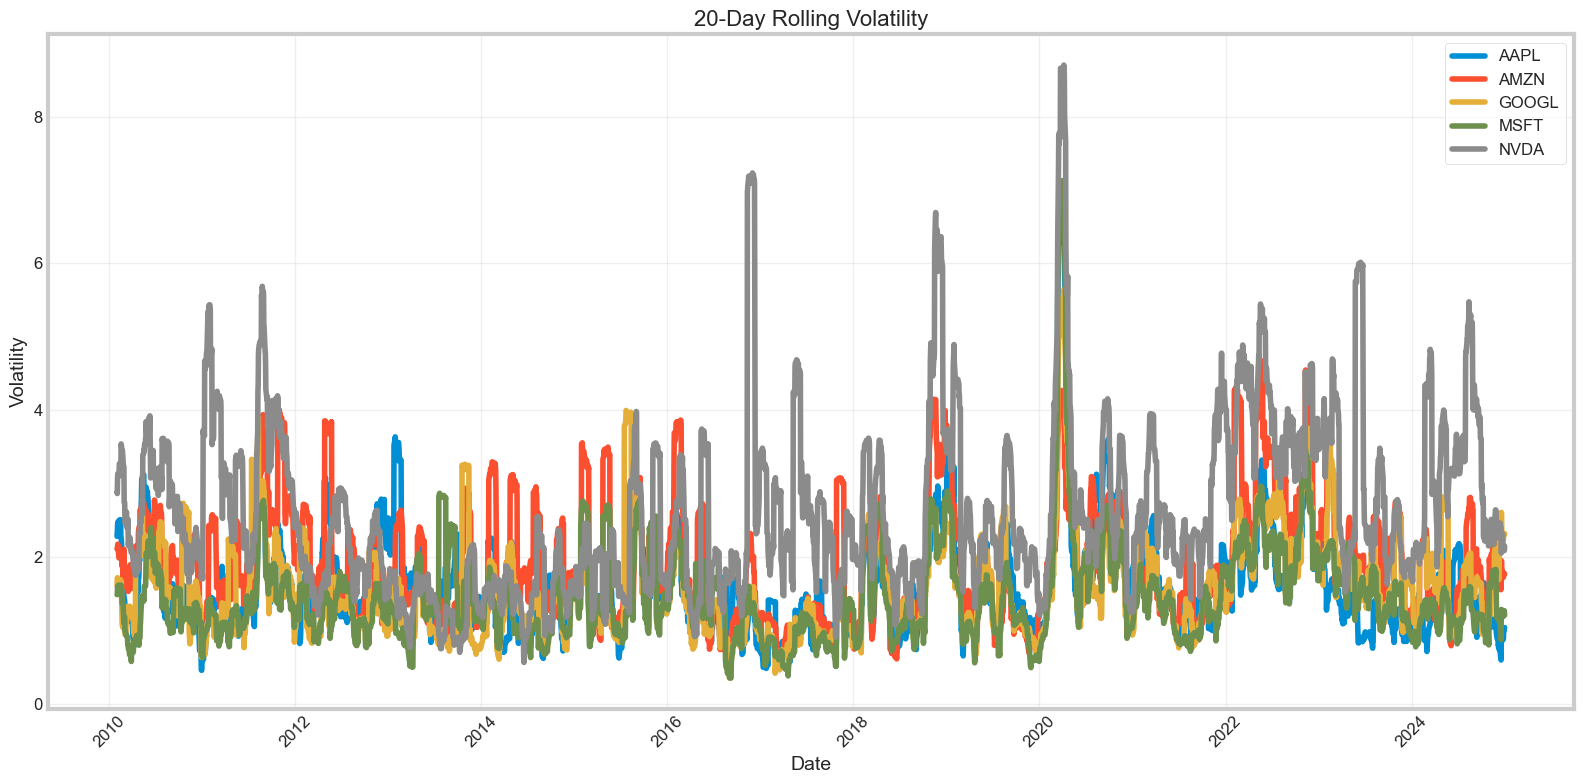

In [ ]:
# 7. Volatility Analysis
print("\n7. Analyzing volatility...\n")

# Plot volatility over time for all companies
plt.figure(figsize=(16, 8))
for company in companies:
    plt.plot(df[f'Volatility_{company}'], label=company)
plt.title('20-Day Rolling Volatility', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Volatility', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('volatility.png')
plt.show()

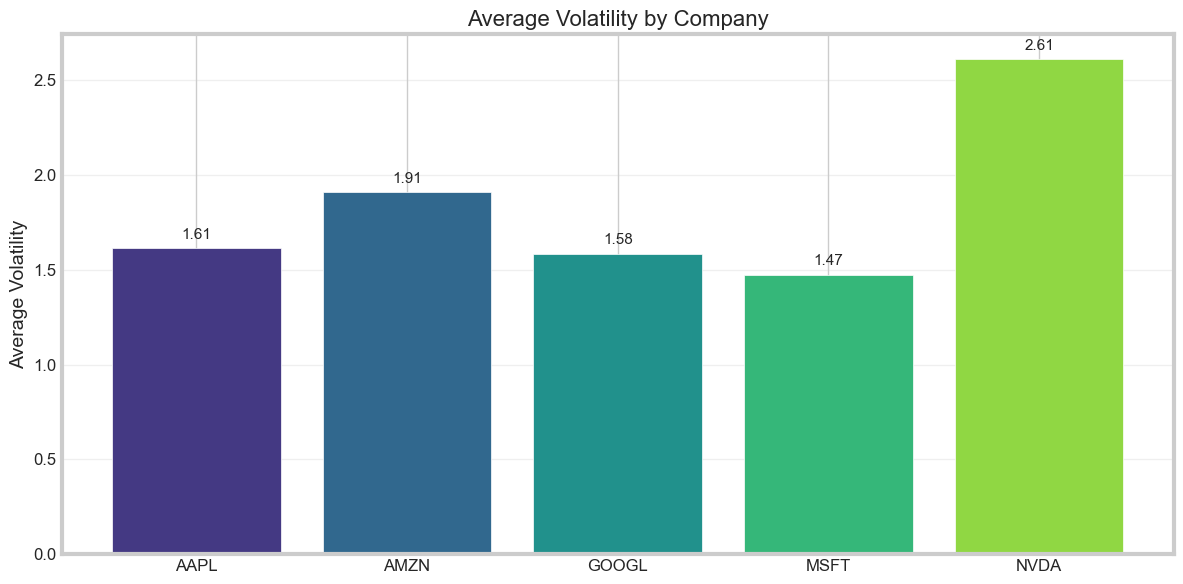

In [ ]:
# Compare average volatility across companies
avg_volatility = {company: df[f'Volatility_{company}'].mean() for company in companies}
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_volatility.keys(), avg_volatility.values(), color=sns.color_palette("viridis", len(companies)))
plt.title('Average Volatility by Company', fontsize=16)
plt.ylabel('Average Volatility', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{height:.2f}', ha='center', fontsize=11)

plt.tight_layout()
#plt.savefig('avg_volatility.png')
plt.show()


8. Analyzing correlations...



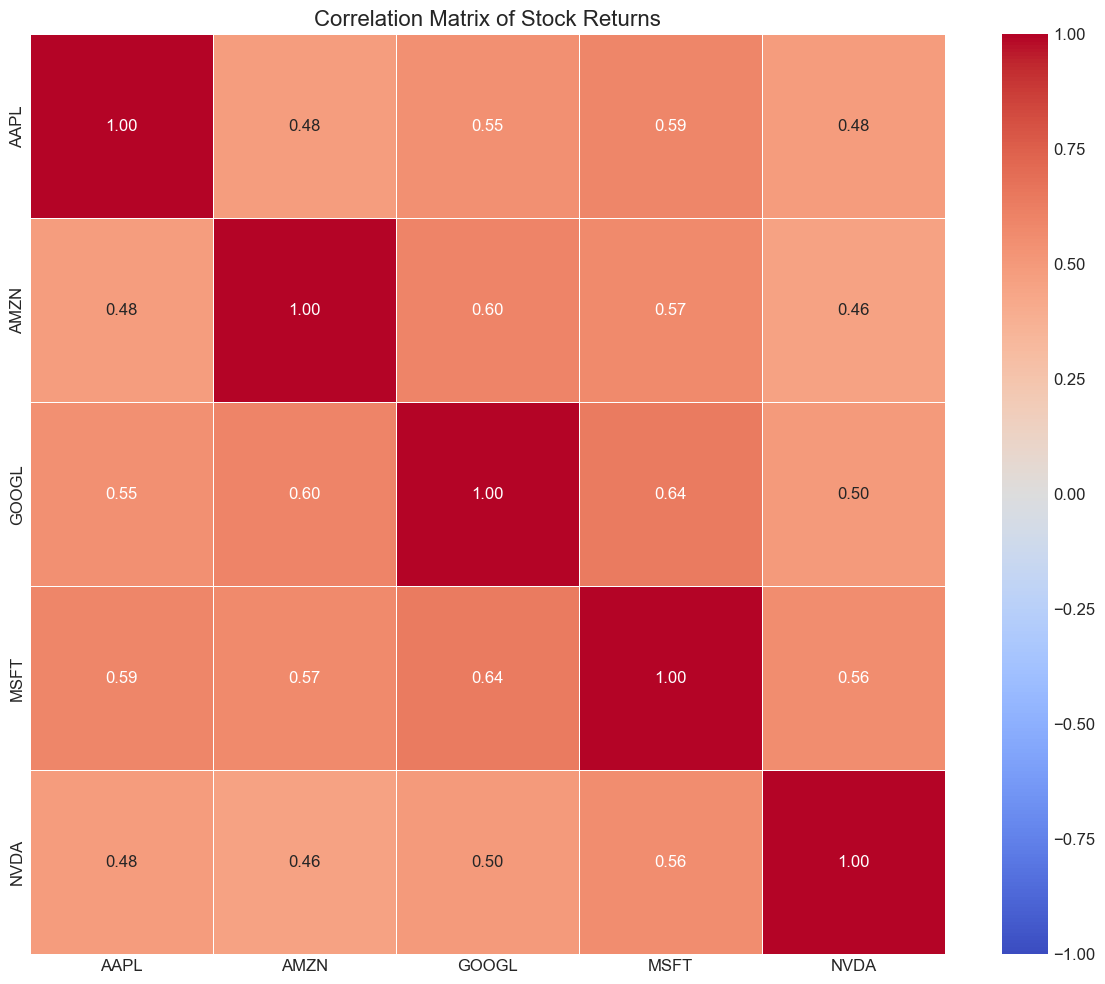

In [ ]:
# 8. Correlation Analysis
print("\n8. Analyzing correlations...\n")

# Correlation between stock returns
returns_correlation = df[[f'Return_{company}' for company in companies]].corr()
returns_correlation.columns = companies
returns_correlation.index = companies

plt.figure(figsize=(12, 10))
sns.heatmap(returns_correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Stock Returns', fontsize=16)
plt.tight_layout()
#plt.savefig('return_correlation.png')
plt.show()

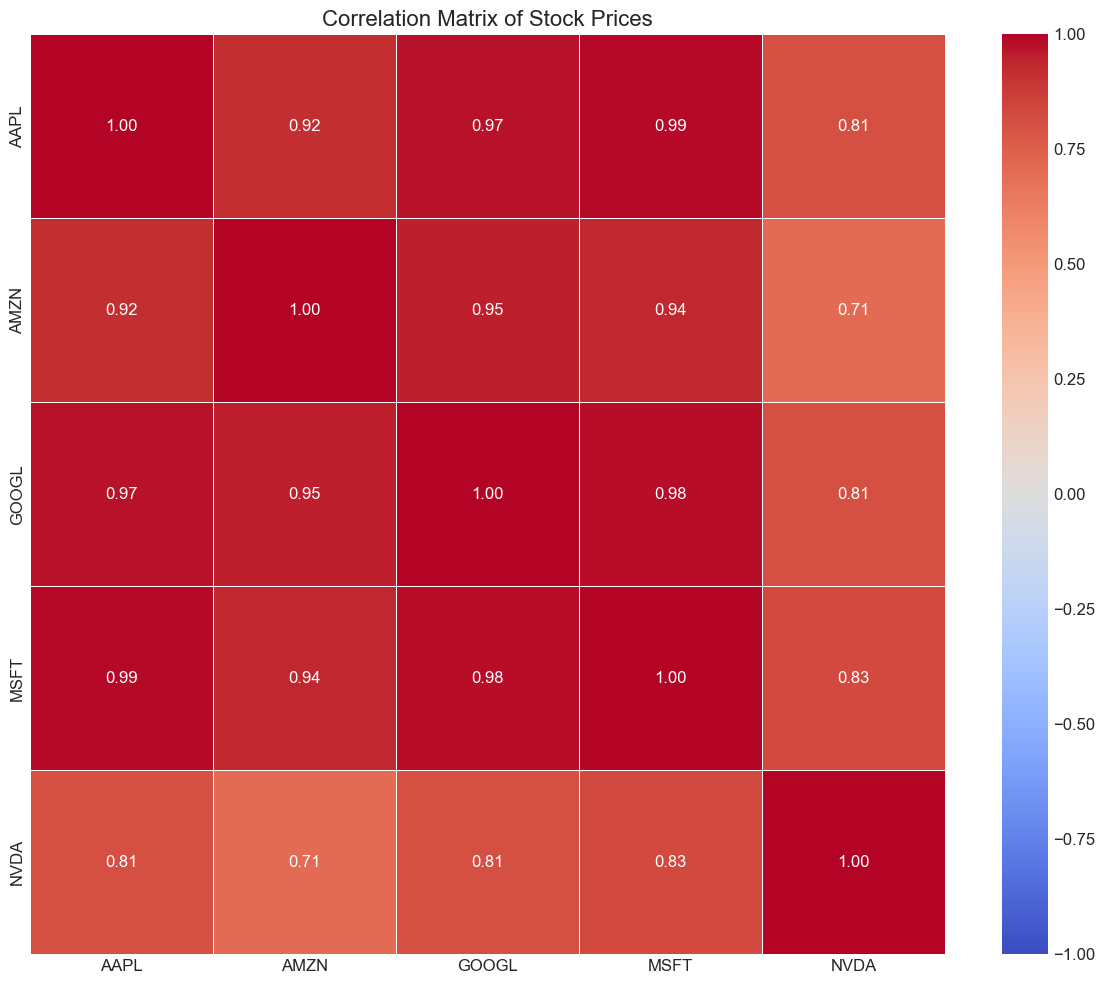

In [ ]:
# Correlation between stock prices
prices_correlation = df[[f'Close_{company}' for company in companies]].corr()
prices_correlation.columns = companies
prices_correlation.index = companies

plt.figure(figsize=(12, 10))
sns.heatmap(prices_correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Stock Prices', fontsize=16)
plt.tight_layout()
#plt.savefig('price_correlation.png')
plt.show()


9. Analyzing beta coefficients...



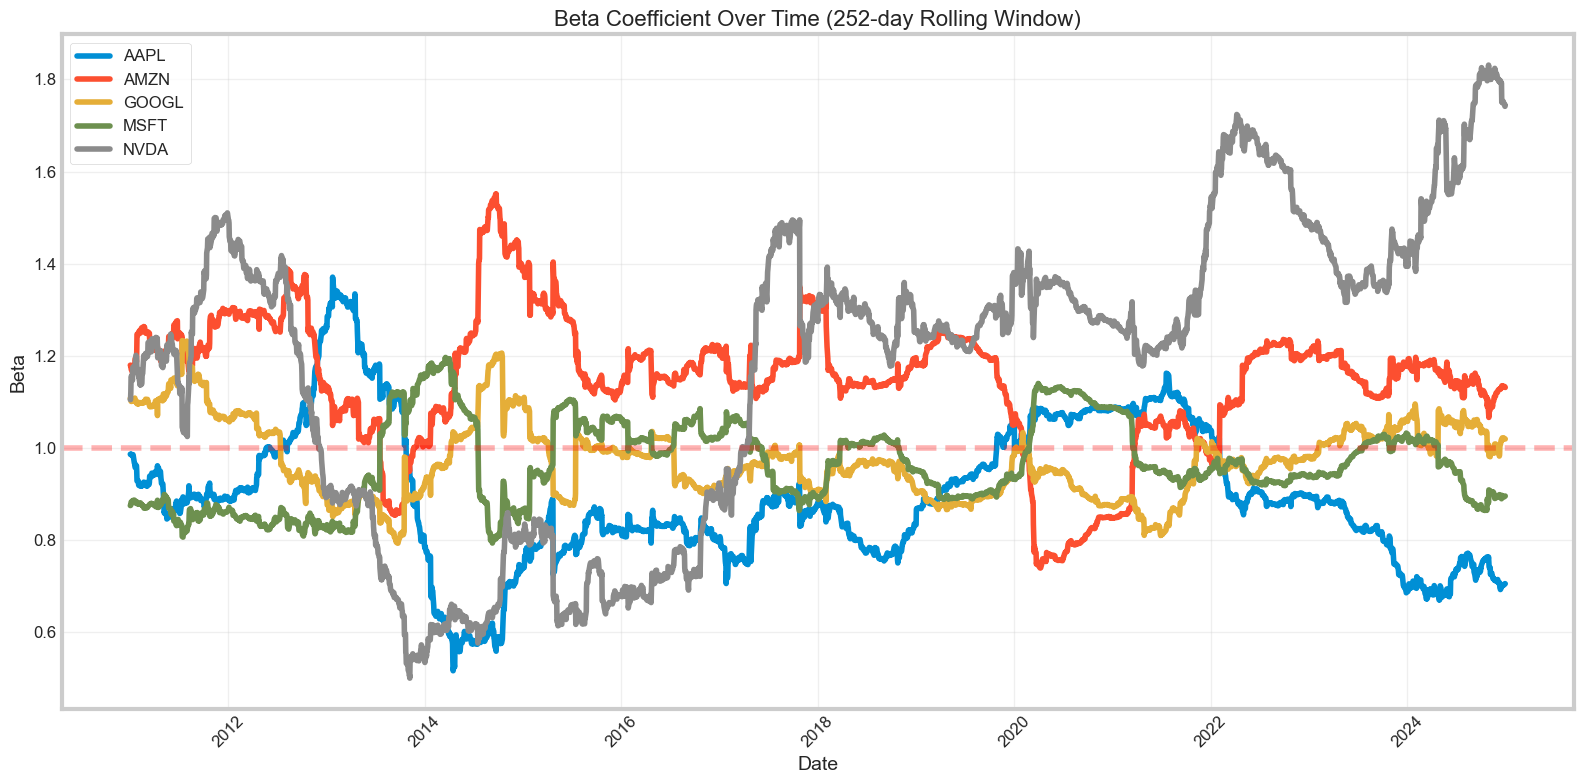

In [ ]:
# 9. Beta Analysis
print("\n9. Analyzing beta coefficients...\n")

# Plot beta over time for each company
plt.figure(figsize=(16, 8))
for company in companies:
    if f'Beta_{company}' in df.columns:
        plt.plot(df[f'Beta_{company}'], label=company)
plt.title('Beta Coefficient Over Time (252-day Rolling Window)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Beta', fontsize=14)
plt.legend(fontsize=12)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.3)  # Market beta = 1
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('beta_time.png')
plt.show()

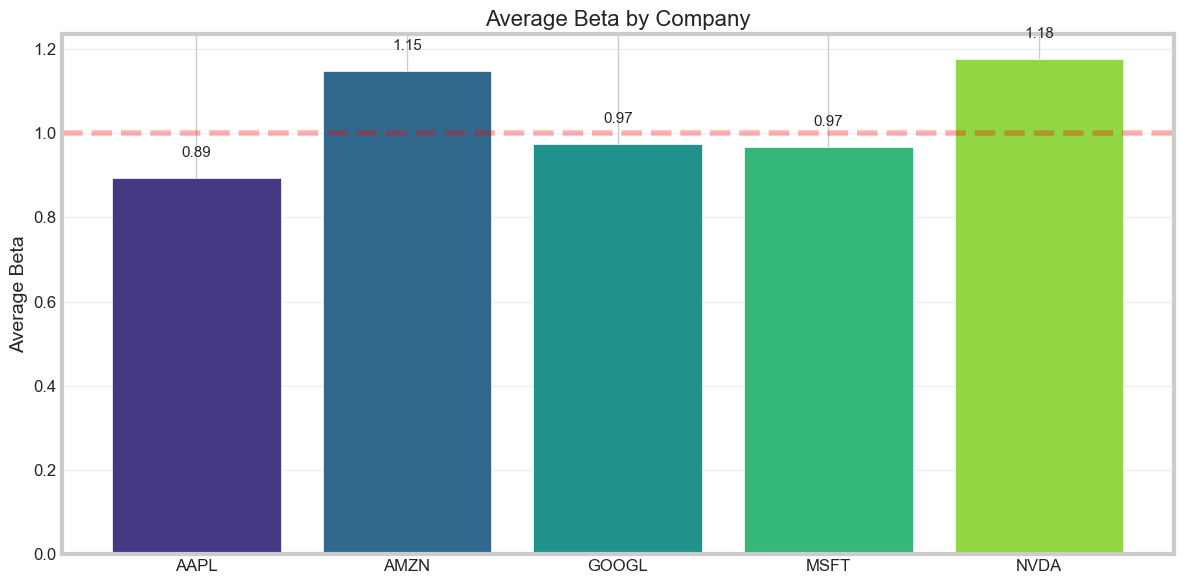

Average Beta values:
AAPL: 0.8943
AMZN: 1.1485
GOOGL: 0.9743
MSFT: 0.9664
NVDA: 1.1762


In [ ]:
# Calculate average beta for each company
if all(f'Beta_{company}' in df.columns for company in companies):
    avg_beta = {company: df[f'Beta_{company}'].mean() for company in companies}
    plt.figure(figsize=(12, 6))
    bars = plt.bar(avg_beta.keys(), avg_beta.values(), color=sns.color_palette("viridis", len(companies)))
    plt.title('Average Beta by Company', fontsize=16)
    plt.ylabel('Average Beta', fontsize=14)
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.3)  # Market beta = 1
    plt.xticks(fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{height:.2f}', ha='center', fontsize=11)
    
    plt.tight_layout()
    #plt.savefig('avg_beta.png')
    plt.show()

    print("Average Beta values:")
    for company, beta in avg_beta.items():
        print(f"{company}: {beta:.4f}")



10. Analyzing technical indicators...



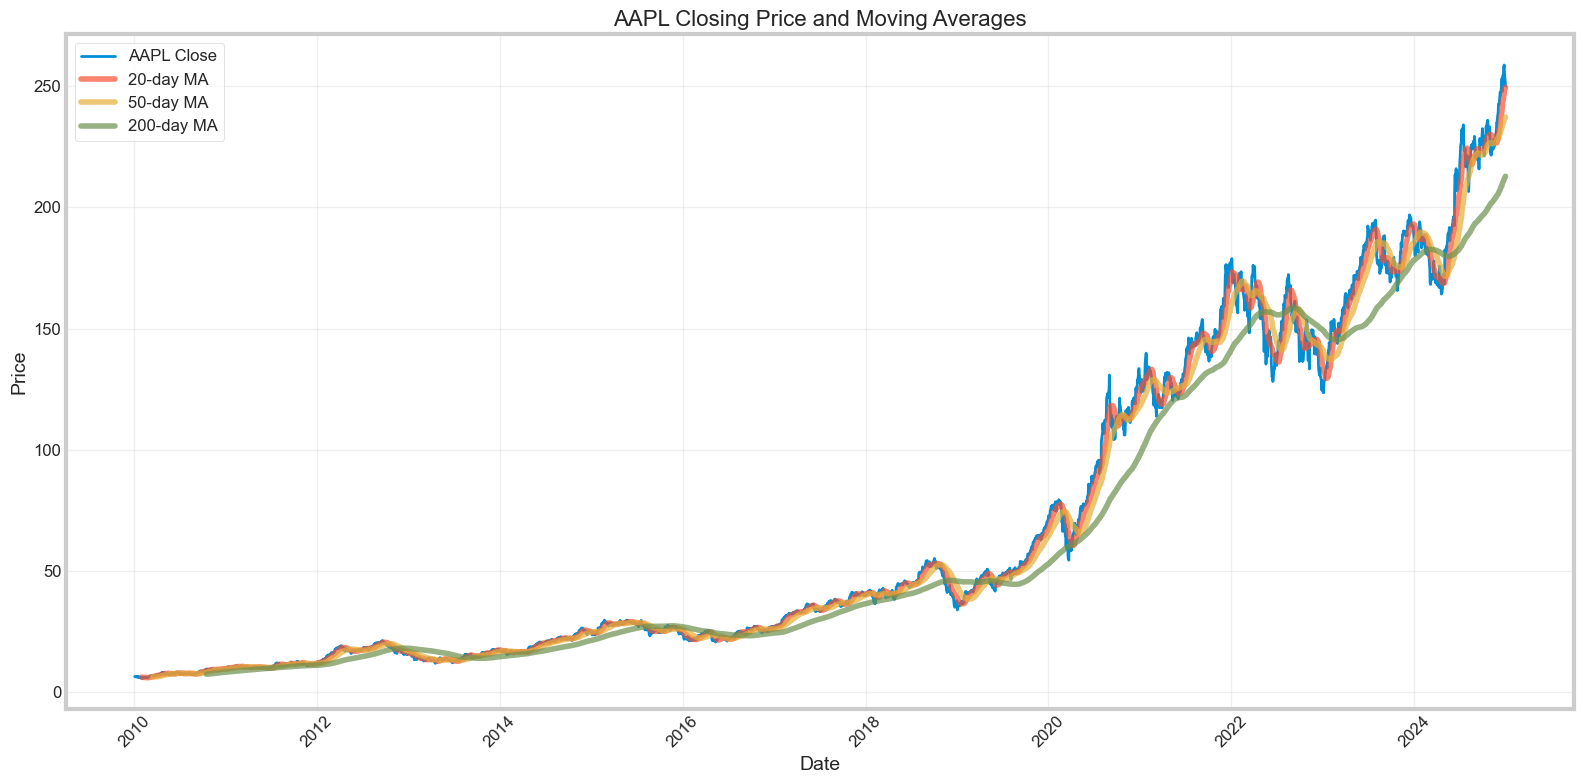

In [ ]:
# 10. Technical Indicator Analysis
print("\n10. Analyzing technical indicators...\n")

# Create function to plot moving averages for a given company
def plot_moving_averages(company):
    plt.figure(figsize=(16, 8))
    plt.plot(df[f'Close_{company}'], label=f'{company} Close', linewidth=2)
    plt.plot(df[f'MA20_{company}'], label='20-day MA', alpha=0.7)
    plt.plot(df[f'MA50_{company}'], label='50-day MA', alpha=0.7)
    plt.plot(df[f'MA200_{company}'], label='200-day MA', alpha=0.7)
    plt.title(f'{company} Closing Price and Moving Averages', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.legend(fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    #plt.savefig(f'{company}_moving_avgs.png')
    plt.show()

# Plot moving averages for an example company
plot_moving_averages('AAPL')

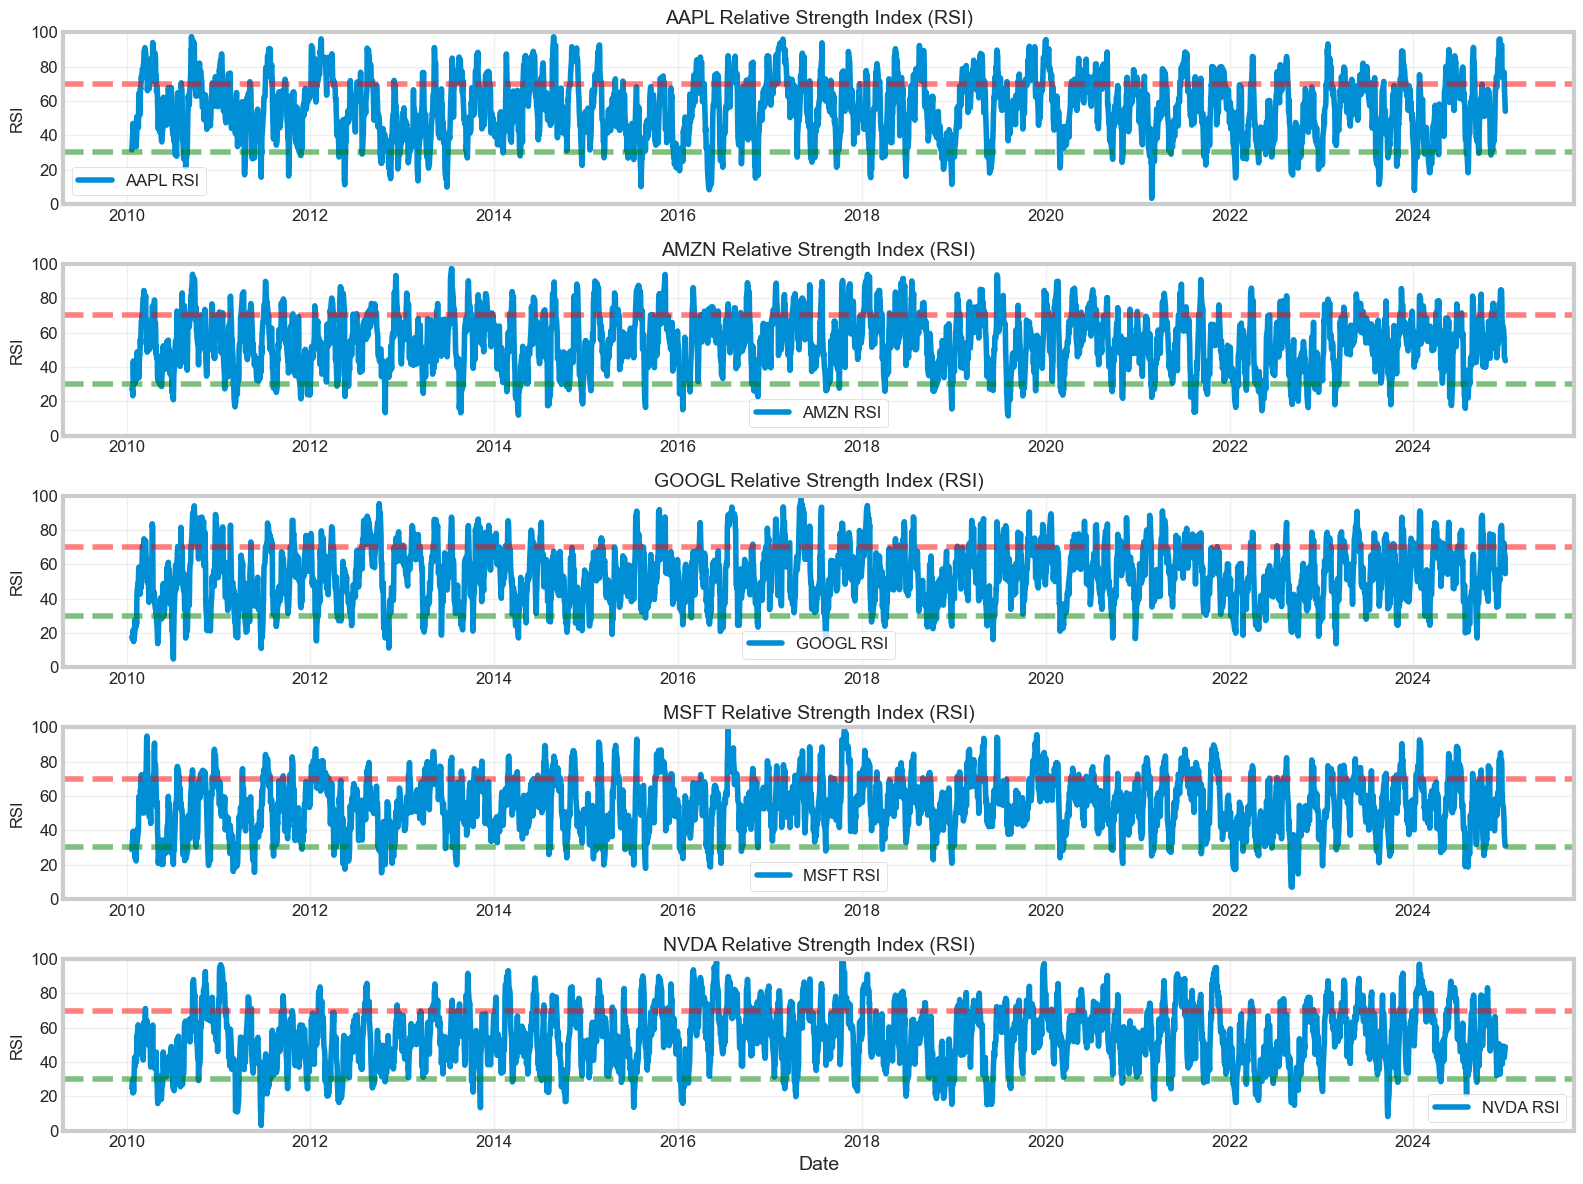

In [ ]:
# Plot RSI for each company
plt.figure(figsize=(16, 12))
for i, company in enumerate(companies, 1):
    plt.subplot(len(companies), 1, i)
    plt.plot(df[f'RSI_{company}'], label=f'{company} RSI')
    plt.axhline(y=70, color='r', linestyle='--', alpha=0.5)  # Overbought threshold
    plt.axhline(y=30, color='g', linestyle='--', alpha=0.5)  # Oversold threshold
    plt.title(f'{company} Relative Strength Index (RSI)', fontsize=14)
    plt.ylabel('RSI', fontsize=12)
    if i == len(companies):  # Only show x-label for the bottom plot
        plt.xlabel('Date', fontsize=14)
    plt.ylim(0, 100)
    plt.legend(fontsize=12)
    plt.grid(True, alpha=0.3)
plt.tight_layout()
#plt.savefig('rsi_all.png')
plt.show()

In [41]:
# 11. Interactive Candlestick Chart (for AAPL as example)
print("\n11. Creating interactive visualizations...\n")

try:
    # Get recent data (last 90 days)
    days = 90
    df_recent = df.iloc[-days:].copy().reset_index()
    company = 'AAPL'  # Example company
    
    # Create candlestick chart
    fig = go.Figure(data=[go.Candlestick(
        x=df_recent['Date'],
        open=df_recent[f'Open_{company}'],
        high=df_recent[f'High_{company}'],
        low=df_recent[f'Low_{company}'],
        close=df_recent[f'Close_{company}'],
        name=company
    )])
    
    # Add MA lines
    fig.add_trace(go.Scatter(
        x=df_recent['Date'],
        y=df_recent[f'MA20_{company}'],
        mode='lines',
        name='20-day MA',
        line=dict(color='blue', width=1)
    ))
    
    fig.add_trace(go.Scatter(
        x=df_recent['Date'],
        y=df_recent[f'MA50_{company}'],
        mode='lines',
        name='50-day MA',
        line=dict(color='red', width=1)
    ))
    
    # Update layout
    fig.update_layout(
        title=f'{company} - Candlestick Chart (Last {days} Days)',
        xaxis_title='Date',
        yaxis_title='Price',
        xaxis_rangeslider_visible=False,
        width=1000,
        height=600
    )
    
    # Save to HTML file for interactivity
    fig.write_html(f'{company}_candlestick.html')
    print(f"Interactive candlestick chart saved to {company}_candlestick.html")
    
    # Display in notebook if running interactively
    fig.show()
except Exception as e:
    print(f"Note: Interactive visualization couldn't be generated: {e}")
    print("This feature requires plotly to be installed and may not work in all environments.")


11. Creating interactive visualizations...

Interactive candlestick chart saved to AAPL_candlestick.html
Note: Interactive visualization couldn't be generated: Mime type rendering requires nbformat>=4.2.0 but it is not installed
This feature requires plotly to be installed and may not work in all environments.


In [42]:
# 12. Summary and Insights
print("\n12. Summary of Key Findings:\n")

print("a) Price Trends:")
for company in companies:
    start_price = df[f'Close_{company}'].iloc[0]
    end_price = df[f'Close_{company}'].iloc[-1]
    percent_change = ((end_price - start_price) / start_price) * 100
    print(f"   - {company}: Started at ${start_price:.2f}, ended at ${end_price:.2f} ({percent_change:.2f}% change)")

print("\nb) Volatility:")
for company, vol in sorted(avg_volatility.items(), key=lambda x: x[1], reverse=True):
    print(f"   - {company}: {vol:.2f}")

print("\nc) Correlation Insights:")
# Find highest correlated pair
max_corr = -1
max_pair = None
for i in range(len(companies)):
    for j in range(i+1, len(companies)):
        corr = returns_correlation.iloc[i, j]
        if corr > max_corr:
            max_corr = corr
            max_pair = (companies[i], companies[j])

print(f"   - Highest return correlation: {max_pair[0]} and {max_pair[1]} ({max_corr:.2f})")

# Find lowest correlated pair
min_corr = 2
min_pair = None
for i in range(len(companies)):
    for j in range(i+1, len(companies)):
        corr = returns_correlation.iloc[i, j]
        if corr < min_corr:
            min_corr = corr
            min_pair = (companies[i], companies[j])

print(f"   - Lowest return correlation: {min_pair[0]} and {min_pair[1]} ({min_corr:.2f})")

print("\nd) Trading Volume Patterns:")
# Find day with highest average volume
for company in companies:
    day_volume = df.groupby('Day_of_Week')[f'Volume_{company}'].mean()
    max_day_index = day_volume.argmax()
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    print(f"   - {company}: Highest average volume on {days[max_day_index]}")

print("\nAnalysis Complete!")


12. Summary of Key Findings:

a) Price Trends:
   - AAPL: Started at $6.44, ended at $250.14 (3784.04% change)
   - AMZN: Started at $6.70, ended at $219.39 (3176.92% change)
   - GOOGL: Started at $15.61, ended at $189.08 (1111.30% change)
   - MSFT: Started at $23.25, ended at $420.66 (1708.96% change)
   - NVDA: Started at $0.42, ended at $134.28 (31577.95% change)

b) Volatility:
   - NVDA: 2.61
   - AMZN: 1.91
   - AAPL: 1.61
   - GOOGL: 1.58
   - MSFT: 1.47

c) Correlation Insights:
   - Highest return correlation: GOOGL and MSFT (0.64)
   - Lowest return correlation: AMZN and NVDA (0.46)

d) Trading Volume Patterns:
   - AAPL: Highest average volume on Tuesday
   - AMZN: Highest average volume on Friday
   - GOOGL: Highest average volume on Friday
   - MSFT: Highest average volume on Friday
   - NVDA: Highest average volume on Friday

Analysis Complete!
